Sơ lược về Algorthims Perceptron :

các 5 bước:

Input : gồm vecto đầu vào x và trọng số w

Action :

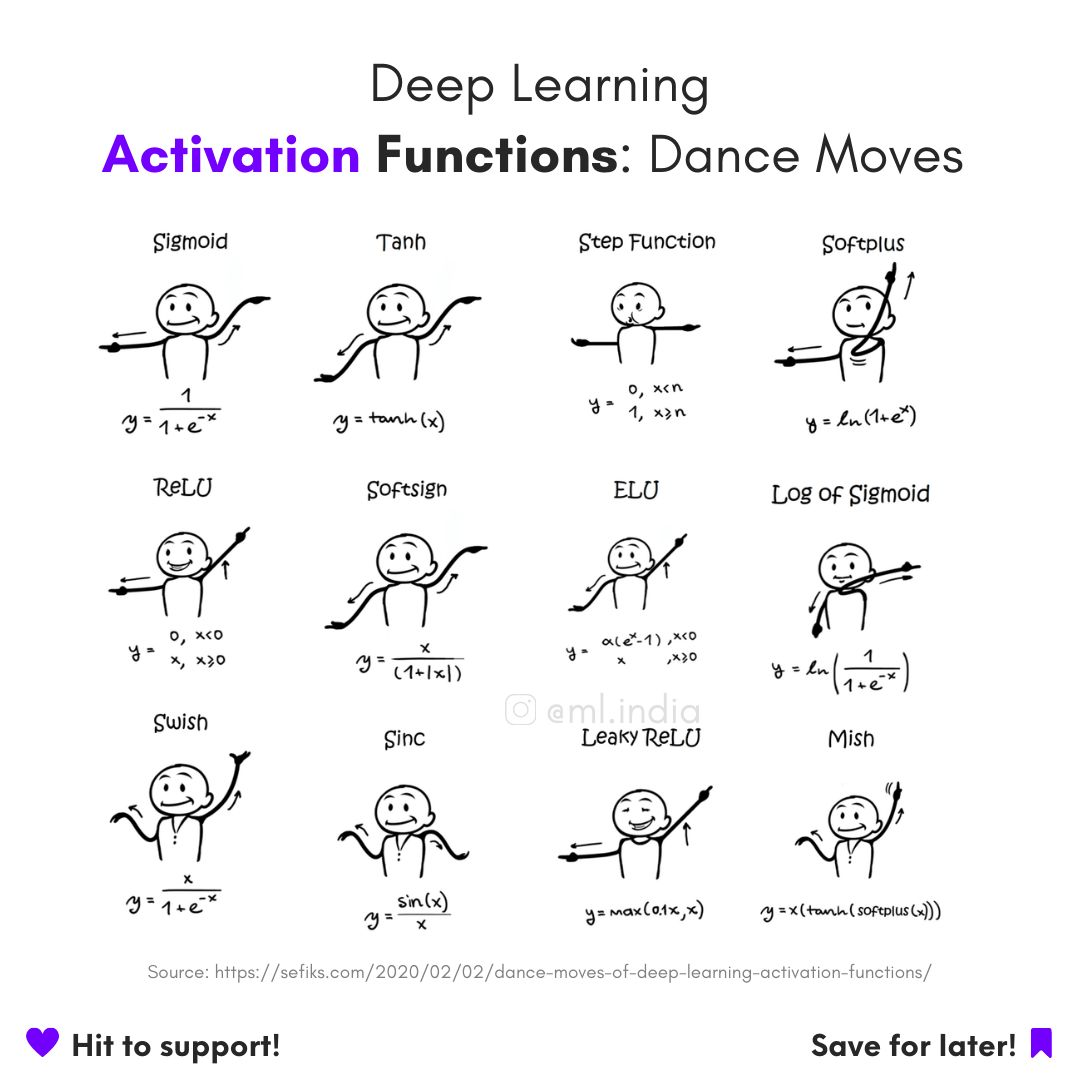

Traing :

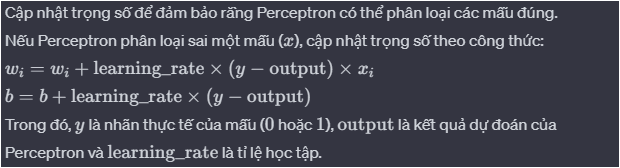

Iterations:

Lặp lại quá trình cập nhật trọng số trên tất cả các mẫu đào tạo cho đến khi không còn lỗi phân loại hoặc đạt đến số lần lặp tối đa được xác định trước.

Predict:

Khi đã được đào tạo, Perceptron có thể dự đoán nhãn mới của mẫu dữ liệu bằng cách sử dụng trọng số đã học và hàm kích hoạt

source reference : https://machinelearningcoban.com/2017/01/21/perceptron/

https://towardsdatascience.com/exploring-the-perceptron-algorithm-using-python-c1d3af53a7c7

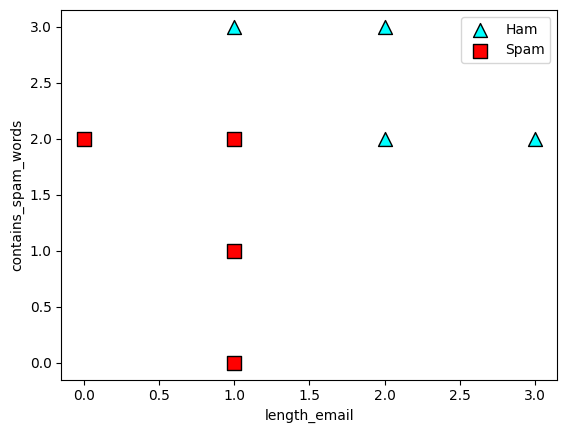

In [135]:
import matplotlib.pyplot as plt
import numpy as np

import random
import plot

features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

# Plotting the points
plot.plot_points(features, labels)

In [136]:
from sklearn.neural_network._base import ACTIVATIONS


https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/neural_network/_base.py#L35

In [137]:
def score(weights, bias, features):
    return features.dot(weights) + bias

def step(x):
    if x >= 0:
        return 1
    else:
        return 0

def prediction(weights, bias, features):
    return step(score(weights, bias, features))

def error(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    if pred == label:
        return 0
    else:
        return np.abs(score(weights, bias, features))

def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    return total_error/len(features)

In [138]:
#weights = [1,1]
#bias = -3.5
weights = [1,2]
bias = -4
for i in range(len(features)):
    print(prediction(weights, bias, features[i]), error(weights, bias, features[i], labels[i]))

0 0
1 0
0 0
1 1
1 0
1 0
1 0
1 0


In [140]:
# First perceptron trick
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    if pred == label:
        return weights, bias
    else:
        if label==1 and pred==0:
            for i in range(len(weights)):
                weights[i] += features[i]*learning_rate
            bias += learning_rate
        elif label==0 and pred==1:
            for i in range(len(weights)):
                weights[i] -= features[i]*learning_rate
            bias -= learning_rate
    return weights, bias

In [141]:
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label-pred)*features[i]*learning_rate
        bias += (label-pred)*learning_rate
    return weights, bias

In [146]:
perceptron_trick(weights, bias, features[6], 0)


([0.96, 1.94], -4.02)

In [145]:
random.seed(0)
def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for epoch in range(epochs):
        # Coment the following line to draw only the final classifier
        plot.draw_line(weights[0], weights[1], bias, color='grey', linewidth=1.0, linestyle='dotted')
        error = mean_perceptron_error(weights, bias, features, labels)
        errors.append(error)
        i = random.randint(0, len(features)-1)
        weights, bias = perceptron_trick(weights, bias, features[i], labels[i])
    plot.draw_line(weights[0], weights[1], bias)
    plot.plot_points(features, labels)
    plt.show()
    plt.scatter(range(epochs), errors)
    return weights, bias

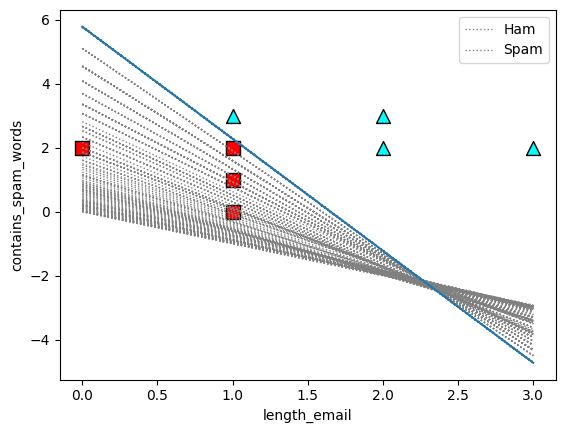

([0.6299999999999997, 0.17999999999999938], -1.0400000000000007)

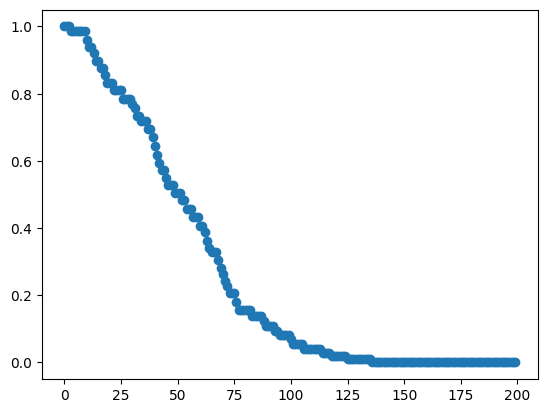

In [147]:
perceptron_algorithm(features, labels)


# Aplication perceptron algorithms

## Spam email filters

In [97]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
import pandas as pd

raw_mail_data = pd.read_csv('/content/drive/MyDrive/project/mail_data.csv')

In [99]:
raw_mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [100]:
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')
print(mail_data.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [101]:
mail_data.loc[mail_data['Category'] == 'ham','Category'] = 1
mail_data.loc[mail_data['Category'] == 'spam','Category'] = 0


In [102]:
mail_data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


các key word thường là email spam

Promotions: discount, offer, 50% off, attractive promotion, buy 1 get 1 free.

Sales: sell, buy, shop, store, order now.

Financial: quick loan, loan, low-interest, make money, get rich.

Health: weight loss pills, acne treatment, beauty products, cosmetic surgery.

Common words: free, complimentary, no cost, just one click, special promotion.

In [103]:
spam_words = [
    'discount', 'offer', '50% off', 'attractive promotion', 'buy 1 get 1 free',
    'sell', 'buy', 'shop', 'store', 'order now',
    'quick loan', 'loan', 'low-interest', 'make money', 'get rich',
    'weight loss pills', 'acne treatment', 'beauty products', 'cosmetic surgery',
    'free', 'complimentary', 'no cost', 'just one click', 'special promotion'
]


In [104]:
def count_spam_words(email_content):
    # Chuyển đổi nội dung email thành chữ thường để so sánh không phân biệt hoa thường
    email_content_lower = email_content.lower()

    # Đếm số từ spam trong email
    count = sum(1 for word in spam_words if word in email_content_lower)

    return count


In [105]:
mail_data.shape

(5572, 2)

In [106]:
mail_data['Message'][1]

'Ok lar... Joking wif u oni...'

In [107]:
mail_data['contains_spam_words'] = 0

In [108]:
mail_data

,Category,Message,contains_spam_words
0,1,"Go until jurong point, crazy.. Available only ...",0
1,1,Ok lar... Joking wif u oni...,0
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,1,U dun say so early hor... U c already then say...,0
4,1,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,0
5568,1,Will ü b going to esplanade fr home?,0
5569,1,"Pity, * was in mood for that. So...any other s...",0
5570,1,The guy did some bitching but I acted like i'd...,0


In [109]:
for i in range(mail_data.shape[0]):
  mail_data['contains_spam_words'][i] = count_spam_words(mail_data['Message'][i])

<ipython-input-109-82222e3edd2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mail_data['contains_spam_words'][i] = count_spam_words(mail_data['Message'][i])


In [110]:
mail_data['contains_spam_words'].value_counts()

0    5110
1     425
2      34
3       3
Name: contains_spam_words, dtype: int64

In [111]:
mail_data

,Category,Message,contains_spam_words
0,1,"Go until jurong point, crazy.. Available only ...",0
1,1,Ok lar... Joking wif u oni...,0
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,1,U dun say so early hor... U c already then say...,0
4,1,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,0
5568,1,Will ü b going to esplanade fr home?,0
5569,1,"Pity, * was in mood for that. So...any other s...",0
5570,1,The guy did some bitching but I acted like i'd...,2


In [112]:
def length_email(email_content):
    # Chuyển đổi nội dung email thành chữ thường để so sánh không phân biệt hoa thường
    email_content_lower = email_content.lower()

    # Đếm số từ spam trong email
    length = len(email_content)

    return length

In [113]:
mail_data['length_email'] = 0

In [114]:
for i in range(mail_data.shape[0]):
  mail_data['length_email'][i] = length_email(mail_data['Message'][i])

<ipython-input-114-8614f5dc4dd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mail_data['length_email'][i] = length_email(mail_data['Message'][i])


In [115]:
mail_data

,Category,Message,contains_spam_words,length_email
0,1,"Go until jurong point, crazy.. Available only ...",0,111
1,1,Ok lar... Joking wif u oni...,0,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,1,U dun say so early hor... U c already then say...,0,49
4,1,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,0,160
5568,1,Will ü b going to esplanade fr home?,0,36
5569,1,"Pity, * was in mood for that. So...any other s...",0,57
5570,1,The guy did some bitching but I acted like i'd...,2,125


In [152]:
X = mail_data[['length_email','contains_spam_words']].values

In [153]:
X

array([[111,   0],
       [ 29,   0],
       [155,   1],
       ...,
       [ 57,   0],
       [125,   2],
       [ 26,   0]])

In [154]:
labels = mail_data['Category'].values

In [133]:
import plot

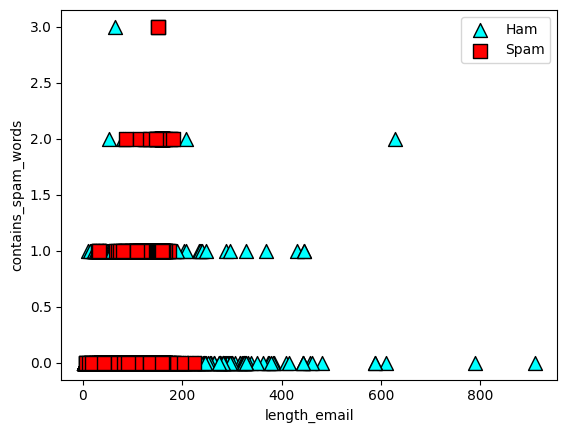

In [155]:
plot.plot_points(X, labels)


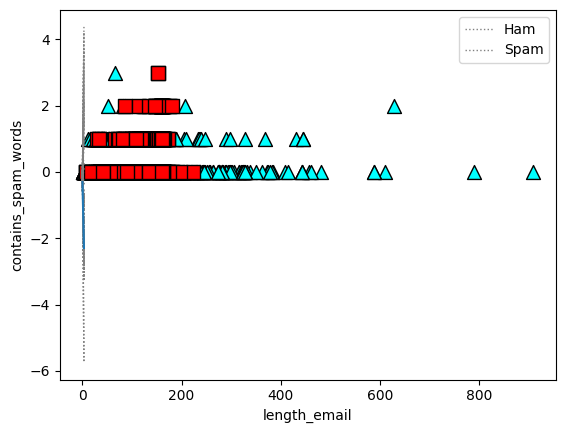

([0.6100000000000001, 0.9199999999999999], 0.2800000000000001)

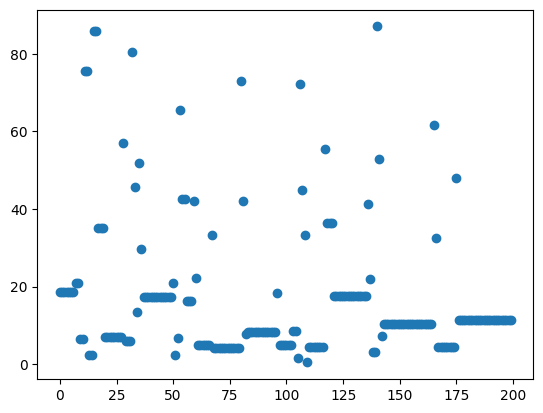

In [156]:
perceptron_algorithm(X, labels)
